### Installing & Importing Required Libraries

In [1]:
!pip install pymysql sqlalchemy 

                                              0.0/44.8 kB ? eta -:--:--
     ------------------------------------     41.0/44.8 kB ? eta -:--:--
     -------------------------------------- 44.8/44.8 kB 734.6 kB/s eta 0:00:00


Error processing line 1 of C:\Users\user\anaconda3\Anaconda3\lib\site-packages\vision-1.0.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\user\anaconda3\Anaconda3\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import pymysql
import sqlalchemy
from tabulate import tabulate 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
df=pd.read_csv('/kaggle/input/swiggy-restuarant-dataset/swiggy.csv')

In [ ]:
df.head(2)

In [ ]:

df.columns=[column.replace(" ", "_") for column in df.columns.to_list()]

# Get column names and data types
column_names = df.columns.tolist()
data_types = df.dtypes.tolist()

# columns changed
df.head(1)

In [ ]:
column_names,data_types

In [ ]:
df.shape

In [ ]:

for column, dtype in zip(column_names, data_types):
    if dtype == 'int64':
        print(f'\nINT---------INT\n{column},{dtype} Range is {df[column].min()} - {df[column].max()}')
    elif dtype == 'object':
        print(f'\nOBJECT#########OBJECT\n{column},{dtype} value width is {df[column].str.len().min()} - {df[column].str.len().max()}')
    else:
        print(f'\nFL+++++++++FL\n{column},{dtype} Range is {df[column].min()} - {df[column].max()}')

In [ ]:

table_name = 'swiggytable'  # Replace with your desired table name
sql_command = f"CREATE TABLE {table_name} (\n"

for column, dtype in zip(column_names, data_types):
    if dtype == 'int64':
        sql_command += f"    {column} INT(10),\n"
    elif dtype == 'object':
        sql_command += f"    {column} VARCHAR(300),\n"
    # Add more data type conditions if needed
    else:
        sql_command += f"    {column} FLOAT(10,5),\n"
    

sql_command = sql_command.rstrip(",\n") + "\n);"

print(sql_command)

### Building Connection

In [ ]:
# Run this cell locally to connect to mysql ( I used phpmyadmin)
# Create connection 
import pymysql.cursors

conn = pymysql.connect(
        host='localhost', 
        user='root',  
        password = "vaishnavi@143", 
        db='swiggy')

In [ ]:
cursor = conn.cursor()

In [ ]:
# Checking connection
cursor.execute("SELECT 1")  # A simple query to test the connection
result = cursor.fetchone()

if result:
    print('Connection is made')
else:
    print('Connection is not made')

In [ ]:
# Also one way to test connection
conn.open

In [ ]:
cursor.execute(sql_command)

In [ ]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://<user>:<password>@<host>/<db>')  

#### <span style="color:red"> if_exists = 'replace' </span> can be used to create a table from scratch which is easier but will cause performance issues because it will assume datatypes of columns

#### we will insert data by using <span style="color:red"> if_exists = 'append' </span> to only insert values

In [ ]:
df.to_sql(name='swiggytable', con=engine, if_exists='append', index=False)

In [ ]:
query = "SELECT COUNT(*) FROM swiggytable"
cursor.execute(query)

# Fetch the first 5 records
print(f'The count of records is {cursor.fetchall()}')


###  Asking Questions

In [ ]:
# 1. Retrieve the top 5 areas with the highest average restaurant ratings. 

query1="SELECT DISTINCT Area, Avg_ratings FROM swiggytable ORDER BY Avg_ratings DESC LIMIT 5;"
cursor.execute(query1)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

### Q2 
### Extracting all food_types to see the unique ones then check veg options

In [ ]:
all_elements = ' '.join(df.Food_type.to_list())
all_elements[:500]

In [ ]:
all_elements = all_elements.replace(' ', ',')
all_elements[:500]

In [ ]:
cuisine_list = all_elements.split(',')
cuisine_list[1:50]

In [ ]:
# set auto picks unique elements
unique_cuisines = set(cuisine_list)
unique_cuisines

In [ ]:
len(unique_cuisines)

After removing the irrelevant terms from the list, the total length of the remaining food options is:

Total length: 129

Cuisines overview 


# Food Types

| Food Type | Description | Notes |
|---|---|---|
| Afghani | Non-veg dishes from Afghanistan, like kebabs and rice | Often includes rice and grilled meats. |
| African | Diverse cuisine with both veg and non-veg options | Can be very spicy. |
| American | Broad cuisine with a mix of veg and non-veg dishes | Includes dishes from all over the United States. |
| Andhra | South Indian cuisine, both veg and non-veg, known for spiciness | Often includes rice, lentils, and spices. |
| Arabian | Middle Eastern cuisine, offers both veg and non-veg dishes | Can be very flavorful and aromatic. |
| Asian | Diverse cuisine with veg and non-veg options | Can be very spicy or mild. |
| Australian | Cuisine with various dishes including veg and non-veg | Often includes seafood and lamb. |
| Awadhi | Indian cuisine with rich non-veg dishes | Often includes ghee and cream. |
| Bakery | Offers veg and non-veg baked goods | Can include cakes, pastries, and breads. |
| Bangladeshi | Cuisine from Bangladesh, includes both veg and non-veg | Often includes rice, lentils, and spices. |
| Barbecue | Often includes veg and non-veg grilled dishes | Can be very smoky. |
| Bengali | Cuisine from West Bengal, offers veg and non-veg dishes | Often includes rice, fish, and sweets. |
| Beverages | Drinks, typically veg | Can include juices, sodas, and coffee. |
| Bihari | Cuisine from Bihar, includes both veg and non-veg | Often includes rice, lentils, and spices. |
| Biryani | Rice dish, can be veg or non-veg | Often includes meat or vegetables, rice, and spices. |
| Bowl | General term, may refer to various veg and non-veg dishes | Can be a salad, soup, or stir-fry. |
| British | Cuisine from the UK, includes both veg and non-veg | Often includes fish and chips, pies, and puddings. |
| Burmese | Cuisine from Myanmar, has both veg and non-veg options | Often includes rice, noodles, and curries. |
| Cafe | Offers various foods including veg and non-veg options | Can include sandwiches, salads, and pastries. |
| Cakes | Sweets, often veg | Can be made with a variety of flavors and ingredients. |
| Chaat | Indian savory snacks, usually veg | Often includes chickpeas, potatoes, and spices. |
| Chettinad | South Indian cuisine with both veg and non-veg dishes | Known for its use of spices. |
| Chinese | Offers both veg and non-veg dishes | Can be very flavorful and aromatic. |
| Coastal | Often includes seafood but can have veg options | Can be very fresh and flavorful. |
| Combos | Mixed meal options, veg and non-veg | Can be a good way to try a variety of dishes. |
| Continental | European cuisine, includes both veg and non-veg | Often includes pasta, risotto, and grilled meats. |
| Cream | Can refer to various dishes, often veg | Can be used to add richness and flavor to dishes. |
| Desserts | Sweets, usually veg | Can include cakes, pastries, and ice cream. |
| Eastern | Broad term, includes both veg and non-veg dishes | Can be very flavorful and aromatic. |
| European | Cuisine from Europe, offers both veg and non-veg | Often includes pasta, risotto, and grilled meats. |
| Fast Food | Various quick meals, includes veg and non-veg | Can be a convenient option for a quick bite to eat. |
| French | Cuisine from France, includes both veg and non-veg | Often includes pastries, cheese, and wine. |
| German | Cuisine from Germany, includes both veg and non-veg | Often includes sausages, beer, and pretzels. |
| Goan | Cuisine from Goa, includes both veg and non-veg | Often includes seafood and coconut. |
| Greek | Cuisine from Greece, offers both veg and non-veg | Often includes grilled meats, seafood, and yogurt. |
| Grill | Often includes both veg and non-veg grilled items | Can be a healthy option for a meal. |
| Haleem | Dish with meat, often non-veg | Made with lentils, meat, and spices. |
| Healthy | Various health-focused dishes, can include veg and non-veg | Can be a good
|Keventers | A popular milkshake and dessert brand known for its milkshakes and dairy-based treats|
| North Eastern | Cuisine from the northeastern regions of India, including states like Assam, Manipur, and Nagaland |
|Bowl Company| A place offering meals served in bowls, often with a variety of ingredients like grains, veggies, and proteins |
|Oriya | Cuisine from the Odisha state in India, known for its unique flavors and vegetarian and non-vegetarian dishes |
|Rayalaseema | Cuisine from the Rayalaseema region in Andhra Pradesh,India, with a mix of vegetarian and non-vegetarian dishes|


# Veg Options 

| Food Type | Veg | Notes |
|---|---|---|
| Ice cream | Usually | Can be made with dairy products. |
| Paan | Often | Betel leaf preparations. |
| Rajasthani | Many options | Cuisine from the Indian state of Rajasthan. |
| Salads | Typically | Many different types available. |
| Sweets | Typically | Many different types available from all over the world. |
| Waffle | Can be made with either | There are many popular veg waffle recipes available. |
| Chaat | Usually | Indian savory snacks. |
| South Indian | Relatively high proportion | Cuisine from the southern part of India. |
| Telangana | Relatively high proportion | Cuisine from the Indian state of Telangana. |
| Gujarati | Many options | Cuisine from the Indian state of Gujarat. |
| Jain | Many options | Cuisine that follows the Jain dietary restrictions. |
| Maharashtrian | Many options | Cuisine from the Indian state of Maharashtra. |
| Kerala | Many options | Cuisine from the Indian state of Kerala. |


In [ ]:
# 2. Find the city with the highest number of restaurants that offer vegetarian food options.

query2="""
SELECT
    city,
    COUNT(ID) AS num_restaurants_with_vegetarian_options
FROM
    swiggytable
WHERE
    city IS NOT NULL
    AND (
        Food_type LIKE '%Ice cream%' OR
        Food_type LIKE '%Paan%' OR
        Food_type LIKE '%Rajasthani%' OR
        Food_type LIKE '%Salads%' OR
        Food_type LIKE '%Sweets%' OR
        Food_type LIKE '%Waffle%' OR
        Food_type LIKE '%Chaat%' OR
        Food_type LIKE '%South Indian%' OR
        Food_type LIKE '%Telangana%' OR
        Food_type LIKE '%Gujarati%' OR
        Food_type LIKE '%Jain%' OR
        Food_type LIKE '%Maharashtrian%' OR
        Food_type LIKE '%Kerala%'
    )
GROUP BY
    city
ORDER BY
    num_restaurants_with_vegetarian_options DESC
LIMIT 1;
"""
cursor.execute(query2)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

In [ ]:
# 3. Calculate the average delivery time for each food type across different cities. 

query3="Select City, avg(Delivery_time) as Average_Delivery_Time from swiggytable group by City order by City;"
cursor.execute(query3)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

In [ ]:
# 4. List the restaurants that have a delivery time greater than the average delivery time in their respective cities.

query4=""" 
select Restaurant,City,Delivery_time,avg(Delivery_time) as City_average
from swiggytable
group by Restaurant,City
having Delivery_time>City_average
order by City,Restaurant
limit 10;
"""
cursor.execute(query4)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

In [ ]:
# 5. Identify the area with the highest total ratings for restaurants serving Indian cuisine.

query5=""" 
SELECT Area, Total_ratings
FROM
    swiggytable
WHERE
    Food_type LIKE '%India%'
GROUP BY
    Area
ORDER BY
    Total_ratings DESC
LIMIT 1;



"""
cursor.execute(query5)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

In [ ]:
# 6. Calculate the percentage of restaurants in each city that offer free delivery.

query6= """
    SELECT 
        City,Count(*) as Restaurants_offering_free ,
    Concat(Round(COUNT(*)*100/(SELECT COUNT(*) FROM swiggytable WHERE City = t.City),3),'%') 
    as Percentage_of_rest_offering_free_delivery 
    FROM swiggytable t 
    where Food_type 
    LIKE "%Free%" 
    OR Price = 0 
    GROUP BY City;
    
    """



cursor.execute(query6)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

In [ ]:
# 7. Determine the average price range for restaurants offering a specific food type in each area.
# assuming ASIAN to be that specific foodtype

query7 = """
SELECT
    Area,
    Food_type,
    AVG(Price) AS Average_Price
FROM
    swiggytable
WHERE
    Food_type LIKE "%asian%"
GROUP BY
    Area, Food_type
LIMIT 5;
    """

cursor.execute(query7)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

In [ ]:
# 8. Find the restaurant IDs that have both the highest average ratings and the highest total ratings. 

query8 = """

SELECT DISTINCT ID,City,Restaurant, Avg_ratings, Total_ratings,Area
FROM swiggytable
ORDER BY Avg_ratings DESC,Total_ratings DESC
  LIMIT 10;
"""

cursor.execute(query8)

# Fetch the records
records = cursor.fetchall()

headers =  [desc[0] for desc in cursor.description]
# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))


### Python vs SQL accuracy

## Correlation Formula

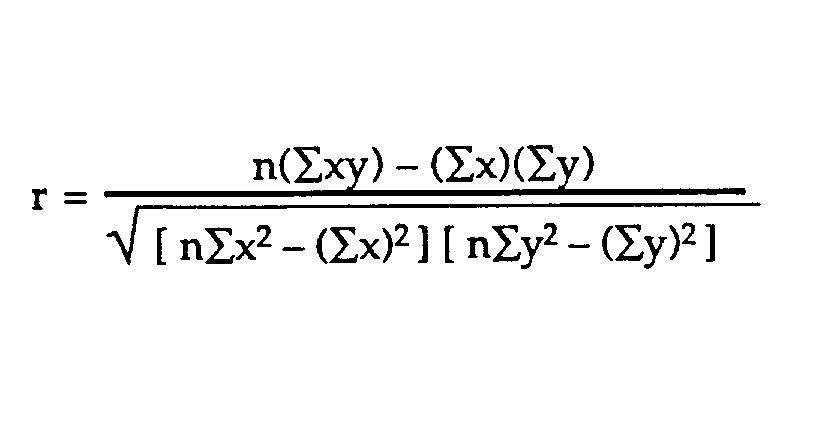

In [ ]:
# 9. Calculate the correlation between restaurant prices and average ratings.
print(f"Correlation by Python is : {df['Price'].corr(df['Avg_ratings'])}")


query9 = """

SELECT
    (N * Product - SUM_Price * SUM_Avg_ratings) /
    SQRT((N * Price_Square - POW((SUM_Price),2)) * (N * Avg_ratings_Square -POW((SUM_Avg_ratings),2)) )
    AS Correlation_By_SQL
FROM (
    SELECT
        COUNT(*) AS N,
        SUM(Price * Avg_ratings) AS Product,
        SUM(Price) AS SUM_Price,
        SUM(Avg_ratings) AS SUM_Avg_ratings,
        SUM(Price * Price) AS Price_Square,
        SUM(Avg_ratings * Avg_ratings) AS Avg_ratings_Square
    FROM swiggytable
) AS calculated_values;

"""

cursor.execute(query9)

# Fetch the records
records = cursor.fetchall()

headers =  [desc[0] for desc in cursor.description]
# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))
print('The accuracy difference is clear')

# Standard Deviation


## Difference between Population Standard Deviation and Sample Standard Deviation

The population standard deviation and sample standard deviation are both measures of how spread out a set of data is. However, there is a key difference between the two: the population standard deviation is calculated using all of the data points in the population, while the sample standard deviation is calculated using a subset of the data points, called the sample.

**Formulas**

The formula for population standard deviation is:


**<span style="color:blue">σ = √∑(x - μ)^2/N</span>** 


where:

* σ is the population standard deviation
* x is a data point
* μ is the population mean
* N is the number of data points in the population

The formula for sample standard deviation is:

**<span style="color:blue">s = √∑(x - x̄)^2/(n - 1)</span>** 

where:

* s is the sample standard deviation
* x is a data point
* x̄ is the sample mean
* n is the number of data points in the sample


### Accuracy

The <span style="color:blue">population standard deviation</span> is more accurate than the <span style="color:blue">sample standard deviation</span> because it is calculated using all of the data points in the population. However, the population standard deviation is not always available, as it may not be possible to collect data on all the members of a population. In these cases, the <span style="color:blue">sample standard deviation</span> can be used as an estimate of the population standard deviation.

### ddof 


|Parameter	|ddof=0	|ddof=1 |
|---|---|---|
|Description	|Calculates the population standard deviation	|Calculates the sample standard deviation|
|Accuracy	|More accurate	|Less accurate|
|Assumption	|The population mean is known	|The population mean is unknown|
|Usefulness	|Not often used	|More often used|

### MySQL vs Python

* In MySQL the default degrees of freedom (ddof) is 0 meaning it calculates population standard deviation by default
* In pandas the default degrees of freedom (ddof) is 1 meaning it calculates sample standard deviation by default


In [ ]:
# 10. List the areas where the distribution of delivery times has the highest standard deviation

# First by Python

# Group the data by 'Area'
grouped= df.groupby('Area')['Delivery_time']

# Calculate the standard deviation for each group
pop_std_deviation = grouped.std(ddof=0)  # Use ddof=0 for population standard deviation 
sample_std_deviation = grouped.std(ddof=1)  # Use ddof=0 for population standard deviation 

print(pop_std_deviation.to_frame().tail(2))
sample_std_deviation.to_frame().tail(2)

In [ ]:
# Sort
pop_sorted_std = pop_std_deviation.sort_values(ascending=False)
sample_sorted_std = sample_std_deviation.sort_values(ascending=False)


# Get the area with the highest standard deviation
highest_std_area_pop = pop_sorted_std.index[0]
highest_std_area_sample = sample_sorted_std.index[0]

# Get value at index 0
value_pop=pop_sorted_std.iloc[0]
value_sample=sample_sorted_std.iloc[0]

In [ ]:
# Print or display the result
print(f"The area with the highest population standard deviation of delivery times is: {highest_std_area_pop} with standard deviation {value_pop}")
print(f"The area with the highest sample standard deviation of delivery times is: {highest_std_area_sample} with standard deviation {value_sample}\n")

print(f'The sample population is {value_sample-value_pop} greater and less accurate than population stdeviation')

In [ ]:
# Now by SQL

query10 = """

SELECT Area, STDDEV(Delivery_time) 
AS Sample_Standard_Deviation_By_Default 
FROM swiggytable
GROUP BY Area
ORDER BY Sample_Standard_Deviation_By_Default DESC
LIMIT 1;

"""

cursor.execute(query10)

# Fetch the records
records = cursor.fetchall()

headers =  [desc[0] for desc in cursor.description]
# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))


In [ ]:

# Close the cursor
cursor.close()

# Close the connection
conn.close()

____